# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.13.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32, ## very import, every time train 32 pic, 64 128
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [5]:
cnn = tf.keras.models.Sequential()
cnn

### Step 1 - Convolution

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [7]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

MaxPool2D 表示這是一個二維最大池化層，用於處理二維圖像數據。

pool_size=2 指定了池化區域的大小，這表示在每個池化操作中，將輸入特徵圖分為2x2的區域。

strides=2 指定了池化操作的步幅，這表示在每次池化操作之間，移動2個像素。步幅控制著池化窗口在輸入特徵圖上的間隔。

Max Pooling 的操作是這樣的：在每個池化區域中，它選擇區域內的最大值並將其作為輸出，並且將這個最大值的位置記錄下來（這可以用於後續的反向傳播）。通過採取最大值，Max Pooling有助於保留最重要的特徵並減少過度擬合。

總之，Max Pooling 在CNN中用於特徵提取和縮小輸入特徵圖的尺寸，使得模型可以更好地處理圖像數據。

### Adding a second convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [10]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [12]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Adam (Adaptive Moment Estimation): Adam 優化器是一種廣泛使用的優化器，通常在深度學習中表現出色。它結合了AdaGrad和RMSprop的優點，具有自適應學習率，適用於各種問題。

SGD (Stochastic Gradient Descent): 隨機梯度下降是最基本的優化器之一。它根據每個小批次的梯度來更新模型參數，可以在一些情況下實現很好的訓練效果，但可能需要調整學習率和其他超參數。

RMSprop (Root Mean Square Propagation): RMSprop 是一種自適應學習率的優化器，通常用於處理非平穩目標函數的問題。它適用於許多情況，無需手動調整學習率。

Adagrad (Adaptive Gradient Algorithm): Adagrad 優化器根據每個參數的過去梯度來調整學習率，適用於稀疏數據集的問題。

Adadelta: Adadelta 是一種自適應學習率的優化器，類似於RMSprop，但避免了RMSprop中的學習率過度遞減的問題。

Nadam (Nesterov-accelerated Adaptive Moment Estimation): Nadam 是一種結合了Nesterov加速梯度和Adam的特點的優化器，通常在許多問題上表現出色。

### Training the CNN on the Training set and evaluating it on the Test set

In [13]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 30s 116ms/step - loss: 0.6630 - accuracy: 0.5895 - val_loss: 0.6305 - val_accuracy: 0.6330
Epoch 2/25
250/250 [==============================] - 28s 112ms/step - loss: 0.5948 - accuracy: 0.6855 - val_loss: 0.5763 - val_accuracy: 0.7160
Epoch 3/25
250/250 [==============================] - 29s 115ms/step - loss: 0.5508 - accuracy: 0.7182 - val_loss: 0.5428 - val_accuracy: 0.7315
Epoch 4/25
250/250 [==============================] - 32s 126ms/step - loss: 0.5300 - accuracy: 0.7341 - val_loss: 0.5157 - val_accuracy: 0.7650
Epoch 5/25
250/250 [==============================] - 29s 116ms/step - loss: 0.5014 - accuracy: 0.7536 - val_loss: 0.5355 - val_accuracy: 0.7390
Epoch 6/25
250/250 [==============================] - 28s 113ms/step - loss: 0.4856 - accuracy: 0.7642 - val_loss: 0.5030 - val_accuracy: 0.7625
Epoch 7/25
250/250 [==============================] - 29s 114ms/step - loss: 0.4801 - accuracy: 0.7703 - val_loss: 0.5280 - val_ac

## Part 4 - Making a single prediction

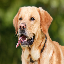

In [51]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image 

In [56]:
test_image = image.img_to_array(test_image)
test_image

array([[[ 54.,  58.,   7.],
        [ 58.,  63.,   9.],
        [ 64.,  67.,  10.],
        ...,
        [136., 144.,  71.],
        [140., 150.,  77.],
        [139., 149.,  78.]],

       [[ 48.,  54.,   6.],
        [ 51.,  58.,   7.],
        [ 58.,  63.,   9.],
        ...,
        [129., 137.,  64.],
        [139., 149.,  78.],
        [141., 151.,  80.]],

       [[ 48.,  56.,   7.],
        [ 48.,  56.,   7.],
        [ 54.,  61.,  10.],
        ...,
        [123., 130.,  63.],
        [136., 145.,  80.],
        [140., 149.,  82.]],

       ...,

       [[ 46.,  55.,  12.],
        [ 42.,  50.,   9.],
        [ 38.,  49.,   9.],
        ...,
        [239., 205., 170.],
        [235., 209., 186.],
        [229., 202., 173.]],

       [[ 50.,  57.,  15.],
        [ 42.,  50.,   9.],
        [ 44.,  52.,  11.],
        ...,
        [234., 200., 162.],
        [236., 206., 178.],
        [234., 203., 174.]],

       [[ 53.,  59.,  13.],
        [ 43.,  51.,  10.],
        [ 49.,  

In [57]:
test_image = np.expand_dims(test_image, axis = 0) # [64,64,3] -> [1,64,64,3]
test_image

array([[[[ 54.,  58.,   7.],
         [ 58.,  63.,   9.],
         [ 64.,  67.,  10.],
         ...,
         [136., 144.,  71.],
         [140., 150.,  77.],
         [139., 149.,  78.]],

        [[ 48.,  54.,   6.],
         [ 51.,  58.,   7.],
         [ 58.,  63.,   9.],
         ...,
         [129., 137.,  64.],
         [139., 149.,  78.],
         [141., 151.,  80.]],

        [[ 48.,  56.,   7.],
         [ 48.,  56.,   7.],
         [ 54.,  61.,  10.],
         ...,
         [123., 130.,  63.],
         [136., 145.,  80.],
         [140., 149.,  82.]],

        ...,

        [[ 46.,  55.,  12.],
         [ 42.,  50.,   9.],
         [ 38.,  49.,   9.],
         ...,
         [239., 205., 170.],
         [235., 209., 186.],
         [229., 202., 173.]],

        [[ 50.,  57.,  15.],
         [ 42.,  50.,   9.],
         [ 44.,  52.,  11.],
         ...,
         [234., 200., 162.],
         [236., 206., 178.],
         [234., 203., 174.]],

        [[ 53.,  59.,  13.],
       

In [ ]:

result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [15]:
print(prediction)

dog


In [21]:
cnn.save("cnn_dog_model.h5")

C:\Users\gostj\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
cnn = tf.keras.models.load_model("cnn_dog_model.h5")

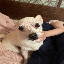

In [58]:
test_image = image.load_img('dataset/Jack/jack.jpg', target_size = (64, 64))
test_image

In [59]:

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 97ms/step
dog


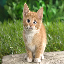

In [40]:
test_image = image.load_img('dataset/cat/cute.jpg', target_size = (64, 64))
test_image

In [41]:

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)


1/1 [==============================] - 0s 31ms/step
dog


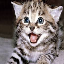

In [60]:
test_image = image.load_img('dataset/cat/cute2.jpg', target_size = (64, 64))
test_image

In [30]:

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

1/1 [==============================] - 0s 25ms/step
cat
